In [1]:
import math
import numpy as np
import sympy as sp
from matplotlib import style
style.use('seaborn')

### 1) Prepare um programa (linguagem de sua preferência) para obter a raiz de uma equação f(x) pelo método da bisseção;

In [2]:
def bissecao(formula,A,B,tol=1.0e-4):
    '''Emprega-se o metodo da bissecao para achar uma raiz da funcao,
    assumindo que exista uma e somente uma raiz no intervalo informado,
    sendo esse intervalo uma parte continua da funcao.
    
    Inputs:
    formula: funcao lambda. ex: lambda x: x**2+2*x+5
    intervalo_A: float
    intervalo_B: float
    tol: float
    
    Output:
    Raiz da equacao (float)
    '''
    
    # Se o intervalo informado ja for BEM proximo da raiz 
    # tendo tol como referencia, retorna A.
    if abs(B-A) <= tol and abs(formula(A)) < 0.0001:
        return A
    

    # MEXENDO COM OS INTERVALOS, SE f(A) > f(B), g(x) = -y(x). 
    # Caso contrario, g(x) = y(x) . A raiz permanece a mesma uma vez que
    #  0 = -0. Dessa forma, ha garantia que g(A) sempre sera menor que
    # g(B), ou seja g sempre sera crescente em relacao aos 2 pontos!
    
    multiplicador = 1
    if formula(A) > formula(B):
        multiplicador = -1
    # esse multiplicador multiplicara o valor da funcao no ponto medio por
    # -1 caso a funcao original seja decrescente.
    
    
    while abs(B-A)>tol:
        chute = (A+B)/2.0 #Chute no ponto medio
        f_chute = multiplicador*formula(chute) #Calculando o valor da funcao
        #no ponto medio aplicando o multiplicador 
        if f_chute > 0:
            B = chute
        else:
            A = chute
    return chute
        
        
    
    

### 2) Prepare um programa (linguagem de sua preferência) para obter a raiz de uma equação f(x) pelo método de Newton (original e secante)

In [3]:
def newton_original(formula,derivada,chute_inicial,max_iter=100,tol=1.0e-4):
    '''Calcula a raiz de uma equacao pelo metodo de Newton original,
    ou seja, calcula-se a derivada analiticamente.
    Inputs:
    formula: funcao lambda.
    derivada: funcao lambda.
    ''' 
    x = chute_inicial
    for k in range(max_iter):
        tmp = x # Esse e o x(k-1)
        x = tmp - formula(tmp)/derivada(tmp)
        tolk = abs(x-tmp)
        if tolk < tol:
            return x
    print('Convergencia nao foi alcancada')
    return
        

In [4]:
def secante(formula,chute_inicial,max_iter=100,tol=1.0e-4):
    '''Calcula a raiz de uma equacao pelo metodo secante,
    derivada calculada numericamente
    Inputs:
    formula: funcao lambda. ex: "lambda x : x**2 + 4*math.cos(x)"
    '''
    delta_x = 0.001
    x_anterior = chute_inicial
    x = chute_inicial + delta_x
    fa = formula(chute_inicial)
    for k in range(max_iter):
        fk = formula(x)
        tmp = x
        x = x - fk*(x-x_anterior)/(fk - fa) # Definindo o proximo x
        tolk = abs(x - tmp)
        if tolk <= tol:
            return tmp
        else:
            fa = fk
            x_anterior = tmp
            
    print('Convergencia nao foi alcancada')
    return
        

### 3) Prepare um programa (linguagem de sua preferência) para obter a raiz de uma equação f(x) pelo método da Interpolação Inversa;


In [5]:
def interpolacao_inversa(formula,x1,x2,x3,chute,max_iter=100,tol=1.0e-4):
    '''Usa-se 3 pontos geralmente para aproximar um polinomio
    quadratico. Com o polinomio, encontra-se a raiz.
    '''
    x = chute
    y1 = formula(x1)
    y2 = formula(x2)
    y3 = formula(x3)
    # Criando listas com as coordenadas
    # Resolvi fazer por listas pra facilmente trabalhar com index,
    # achar maior valor absoluto e substituir valores.
    lx = [x1,x2,x3]
    ly = [y1,y2,y3]
    for k in range(max_iter):
        tmp = x
        x = (ly[1]*ly[2]*lx[0]/((ly[0]-ly[1])*(ly[0]-ly[2])) +
            ly[0]*ly[2]*lx[1]/((ly[1] - ly[0])*(ly[1] - ly[2])) +
            ly[0]*ly[1]*lx[2]/((ly[2] - ly[0])*(ly[2] - ly[1])))
        
        tolk= abs(x-tmp)
        if tolk <= tol:
            return x
        else:
            i = ly.index(max(ly,key = lambda z: abs(z))) #Pega
            # o index de maior valor absoluto de ly
            lx[i] = x
            ly[i] = formula(x)
            lx.sort()
            ly.sort()
            
            
    print('Convergencia nao alcancada')
            

### 4) Prepare um programa (linguagem de sua preferência) para obter a solução de um sistema de equações (n equações e n incógnitas) usando o método de Newton e o método de Broyden;

In [6]:
import LU #Importando solucao por LU da lista passada

In [7]:
def sistema_newton(formula,jacobiano,sol_partida,max_iter=100,tol=1.0e-4):
    '''Procura a solucao do sistema atraves do metodo de newton,
    usando derivada analitica. 
    Convergencia nao garantida!

    '''
    x = np.array(sol_partida,float)
    for k in range(max_iter):
        
        J = np.array(jacobiano(*x),float)
        
        # Ao trabalhar com mais de uma equacao e incognita, formula(*x) vai retornar uma lista de arrays.
        # Quando eu fizer um array de uma lista de arrays, seria como eu estivesse criando uma nova dimensao.
        # Um problema com 2 equacoes e 2 incognitas, gerando uma matriz 2x2 sera transformado em algo do 
        # tipo 2x2x1. Isso da problema na hora de multiplicar as matrizes.
        # Dessa forma, estou usando o np.squeeze para eliminar essa terceira 'dimensao'.
        # Note que, quando usado para descobrir raizes de uma equacao, esse problema nao acontece, logo nao ha
        # como eliminar a terceira 'dimensao'. Por isso, existe o bloco try - except abaixo.
        try:
            J = np.squeeze(J,axis=2)
        except:
            pass
        
        F = np.array(formula(*x),float)
        try:
            F = np.squeeze(F,axis=2)
        except:
            pass
        
        _,_,delta_x = LU.fact_lu(J,-F)
        x = x + delta_x
        
        tolk = (math.sqrt(sum(h**2 for h in delta_x))/
                math.sqrt(sum(m**2 for m in x)))
        if tolk <= tol:
            return x
    print('Convergencia nao alcancada')
    return

In [8]:
def broyden(formula,sol_partida,max_iter=100,tol=1.0e-4):
    '''Procura a solucao de um sistema sem a necessidade de explicitamente definir a derivada.'''
    size = len(sol_partida)
    
    B = np.eye(size) #definindo B como matriz identidade
    x = np.array(sol_partida,float)
    for k in range(max_iter):
        
        F = np.array(formula(*x),float)
        
        try:                    
            F = np.squeeze(F,axis=2)
        except:
            pass
        
        _,_,delta_x = LU.fact_lu(B,-F)
        x = x + delta_x
        
        new_F = np.array(formula(*x),float)
        try:
            new_F = np.squeeze(new_F,axis=2)
        except:
            pass
        
        Y = new_F - F
        tolk = (math.sqrt(sum(h**2 for h in delta_x))/
                math.sqrt(sum(m**2 for m in x)))
        if tolk <= tol:
            return x
        else:
            z = Y - np.dot(B,delta_x)
            dx_vezes_trans = np.dot(np.transpose(delta_x),delta_x)
            B = B + np.divide(np.dot(z,np.transpose(delta_x)),dx_vezes_trans)
        
           

    print('Convergencia nao alcancada')
    return 

### 5) Prepare um programa (linguagem de sua preferência) para efetuar o ajuste de curvas não-lineares (mínimos quadrados).

In [9]:
def ajuste(formula,derivada,chute_inicial,max_iter=100,tol=1.0e-4):
    '''Recebe a matriz da funcao ja com os pontos x,y em seus
    determinados lugares!
    Pode nao convergir dependendo do ponto de partida e/ou das derivadas.
    Ex de utilizacao para funcao b0+b1*x**b2: 
    x_pontos = [1,2,3]
    y_pontos = [1,2,9]
    funcao = lambda b0,b1,b2 : [[b0+b1*x**b2-y] for x,y in zip(x_pontos,
    y_pontos)]
    derivada = lambda b0,b1,b2 : [[d_f1/db0, d_f1/db1... d_f1/dbn]]
    '''
    
    
    
    b = np.array(chute_inicial,float)
    for k in range(max_iter):
        F = np.array(formula(*b),float)
        try:
            F = np.squeeze(F,axis=2)
        except:
            pass

        J = np.array(derivada(*b),float)
        try:
            J = np.squeeze(J,axis=2)
        except:
            pass

        J_transposto = np.transpose(J)
        
        A = np.dot(J_transposto,J)

        C =  np.dot(J_transposto,-F)

        try:
            _,_,delta_b = LU.fact_lu(A,C)
        except:
            return None

        b = b + delta_b
        tolk = (math.sqrt(sum(h**2 for h in delta_b))/
                math.sqrt(sum(m**2 for m in b)))
        if tolk <= tol:
            return b
    print('Convergencia nao alcancada')
    return

In [10]:
x_exemplo = [1,2,3]
y_exemplo = [1.995,1.41,1.26]
func_exemplo = lambda a,b :[[math.exp(x**a/b)-y] for x,y in zip(x_exemplo,y_exemplo)]
derivada_exemplo = lambda a,b : [[x**a*math.log(x)/b*math.exp(x**a/b),
                                 -(x**a)*x**a/(b**2)*math.exp(x**a/b)] for x in x_exemplo]
b_exemplo = [[0],[1]]

In [11]:
ajuste(func_exemplo,derivada_exemplo,b_exemplo)

array([[-1.00201833],
       [ 1.44810676]])

### APLICACOES

### 1) Utilizando os programas desenvolvidos encontre as raízes da seguinte equação por todos os métodos apresentados em sala de aula.

$$f(x) = log(cosh(x\sqrt{gk})) - 50$$

In [12]:
from math import sqrt,cos,sin,cosh,sinh,log

In [13]:
g = 9.806
k = 0.00341
funcao_ex1 = lambda x: log(cosh(x*sqrt(g*k))) - 50

Plotando a funcao para ja atribuir uma solucao inicial aproximada:

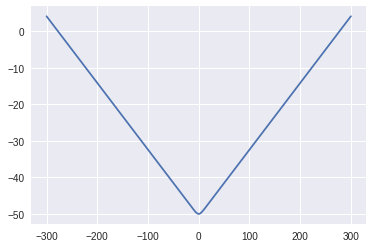

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

val_x = []
val_y = []

for i in range(-300,301):
    val_x.append(i)
    val_y.append(funcao_ex1(i))

fig, ax = plt.subplots()
ax.plot(val_x,val_y)


Pelo grafico, utilizando x pertencente a [-300,300], percebe-se que ha 2 raizes.

#### Pelo metodo da bissecao:

Como o metodo da bissecao funciona
direito apenas para uma raiz entre um intervalo, optei por definir A = -300 e B = -200 para descobrir a primeira raiz, e A=300, B = 200 para descobrir a segunda

In [15]:
bissecao(funcao_ex1,A=-300,B=-200)

-277.2210121154785

In [16]:
bissecao(funcao_ex1,A=300,B=200)

277.2210121154785

#### Pelo metodo de Newton:

Achando a derivada:

In [17]:
x_sb = sp.Symbol('x')
sp.diff(sp.log(sp.cosh(x_sb*sp.sqrt(g*k))) - 50)

0.182861860430217*sinh(0.182861860430217*x)/cosh(0.182861860430217*x)

In [18]:
derivada_ex1 = lambda x: 0.182861860430217*sinh(0.182861860430217*x)/cosh(0.182861860430217*x)

Achando a primeira raiz:

In [19]:
newton_original(funcao_ex1,derivada_ex1,chute_inicial=-500)

-277.22099655606087

Segunda raiz:

In [20]:
newton_original(funcao_ex1,derivada_ex1,chute_inicial=1000)

277.2209965560609

#### Pelo metodo secante:

In [21]:
secante(funcao_ex1,chute_inicial=-2456)

-277.2209967106314

In [22]:
secante(funcao_ex1,chute_inicial=2540)

277.2209960131954

#### Pelo metodo da interpolacao inversa:

In [23]:
interpolacao_inversa(funcao_ex1,x1=-300,x2=-200,x3=-100,chute=5000)

-277.22099655606104

In [24]:
interpolacao_inversa(funcao_ex1,x1=1000,x2=1,x3=500,chute=7000)

277.22099655606087

#### Pelo metodo de resolucao de sistemas de newton:

In [25]:
sistema_newton(lambda x: [[log(cosh(x*sqrt(g*k))) - 50]],lambda x : [[0.182861860430217*sinh(0.182861860430217*x)
                                                                      /cosh(0.182861860430217*x)]],[[-300]])

array([[-277.22099656]])

In [26]:
sistema_newton(lambda x: [[log(cosh(x*sqrt(g*k))) - 50]],lambda x : [[0.182861860430217*sinh(0.182861860430217*x)/
                                                                      cosh(0.182861860430217*x)]],[[400]])

array([[277.22099656]])

#### Por broyden:

In [27]:
broyden(lambda x: [[log(cosh(x*sqrt(g*k))) - 50]],[[-300]])

array([[-277.22099656]])

In [28]:
broyden(lambda x: [[log(cosh(x*sqrt(g*k))) - 50]],[[650]])

array([[277.22099656]])

### 2) Repita o exercício anterior para a função:

$$f(x) = 4cos(x) - e^{2x}$$

In [29]:
funcao_ex2 = lambda x:4*cos(x) - math.exp(2*x)

Plotando:

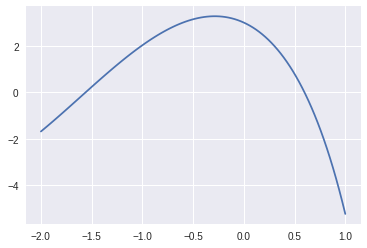

In [30]:
ex2_X = np.linspace(-2,1,100)
Vetorizacao = np.vectorize(funcao_ex2)
plt.plot(ex2_X,Vetorizacao(ex2_X))


2 raizes tambem!

#### Por bissecao:

Assumindo A = -0.6 e B = 1.0 para a primeira raiz e A = 0 e B = - 2 para a segunda:

In [31]:
bissecao(funcao_ex2,A=-.06,B=1.0)

0.597906494140625

In [32]:
bissecao(funcao_ex2,A=0,B=-2)

-1.55975341796875

#### Por Newton:

Descobrindo a derivada:
    

In [33]:
sp.diff(4*sp.cos(x_sb) - sp.exp(2*x_sb))

-2*exp(2*x) - 4*sin(x)

In [34]:
newton_original(funcao_ex2,lambda x:-2*math.exp(2*x) - 4*sin(x),chute_inicial=-1)

-1.5597513183190628

In [35]:
newton_original(funcao_ex2,lambda x:-2*math.exp(2*x) - 4*sin(x),chute_inicial=1)

0.5978860670377387

#### Por Secante:

In [36]:
secante(funcao_ex2,chute_inicial= -.5)

-1.5597518197305278

In [37]:
secante(funcao_ex2,chute_inicial=1)

0.5978864395480724

#### Por interpolacao inversa:

In [38]:
interpolacao_inversa(funcao_ex2,-4,-2,0,chute=504521e120)

-1.5597513182154576

In [39]:
interpolacao_inversa(funcao_ex2,0.5,0.2,0.6,chute=-3112e17)

0.6061505095068971

#### Pelo metodo de resolucao de sistemas de newton:

In [40]:
sistema_newton(formula=lambda x:[[4*cos(x) - math.exp(2*x)]],jacobiano=lambda x:[[-2*math.exp(2*x) - 4*sin(x)]],
              sol_partida=[[1]])

array([[0.59788607]])

In [41]:
sistema_newton(formula=lambda x:[[4*cos(x) - math.exp(2*x)]],jacobiano=lambda x:[[-2*math.exp(2*x) - 4*sin(x)]],
              sol_partida=[[-2]])

array([[-1.55975132]])

#### Por Broyden:

In [42]:
broyden(formula=lambda x:[[4*cos(x) - math.exp(2*x)]],sol_partida=[[1]])

array([[0.59788607]])

In [43]:
broyden(formula=lambda x:[[4*cos(x) - math.exp(2*x)]],sol_partida=[[-2]])

array([[-1.55975132]])

#### NOTA:

Essa funcao possui muitos pontos proximos de y=0. Dependendo do valor da tolerancia, os valores encontrados podem variar

### 3) Encontre uma solução para o seguinte sistema de equações não-lineares pelos métodos de Newton e Broyden utilizando os programas desenvolvidos:

$$16x^4 + 16y^4 + z^4 = 16$$
$$x^2 + y^2 + z^2 = 3$$
$$x^3 - y + z = 1$$

In [44]:
func_ex3 = lambda x,y,z : [[16*x**4 + 16*y**4 + z**4 - 16],
                          [x**2+y**2+z**2 -3],
                          [x**3 - y + z - 1]]

#### Por Newton:

In [45]:
derivada_ex3 = lambda x,y,z : [[64*x**3,64*y**3,4*z**3],
                          [2*x,2*y,2*z],
                          [3*x**2,-1,1]]

In [46]:
sistema_newton(func_ex3,derivada_ex3,sol_partida=[[.79],[.8],[1.3]])

array([[0.79040955],
       [0.80688816],
       [1.31308196]])

#### Por Broyden:

In [47]:
broyden(func_ex3,[[.79],[.8],[1.3]])

array([[0.79104173],
       [0.80629739],
       [1.31306449]])

### 4) Resolva, utilizando os programas desenvolvidos, o seguinte sistema de equações não-lineares (usando os métodos de Newton e de Broyden):

$$2b^2 + a^2 + 6c^2 = 1.0$$
<br>
$$8b^3 + 6ba^2+36bac + 108bc^2 = \theta_1$$<br>
$$60b^4 + 60b^2a^2 + 576b^2ac + 2232b^2c^2 + 252c^2a^2 + 1296c^3a + 3348c^4 + 24a^3c + 3a = \theta_2$$ <br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;onde $a = c_2 , b = c_3$ e $c = c_4$ 

#### Primeiro caso :
$\theta_1 = 0.00$ e  $\theta_2 = 3.0$

In [48]:
func_ex4 = lambda a,b,c: [[2*b**2 + a**2 + 6*c**2 - 1.0],
                         [8*b**3 + 6*b*a**2 + 36*b*a*c + 108*b*c**2 - 0],
        [60*b**4+60*b**2*a**2+576*b**2*a*c+2232*b**2*c**2+
         252*c**2*a**2+1296*c**3*a+3348*c**4+24*a**3*c+3*a - 3.0]]

In [49]:
derivada_ex4 = lambda a,b,c : [[2*a,4*b,12*c],
                          [12*b*a + 36*b*c,24*b**2+6*a**2+36*a*c+
                           108*c**2,36*b*a+216*b*c],
                          [120*b**2*a+576*b**2*c+504*c**2*a+
                           1296*c**3+72*a**2*c+3,
                          240*b**3+120*b*a**2+2*576*b*a*c+4464*b*c**2,
                          576*b**2*a+4464*b**2*c+504*c*a**2+
                           3*1296*c**2*a+4*3348*c**3+24*a**3]]

##### Por Newton:

In [50]:
sistema_newton(func_ex4,derivada_ex4,sol_partida=[[.4],[.2],[.1]])

array([[ 1.00000000e+00],
       [-6.74389829e-14],
       [ 2.98642899e-12]])

 &emsp;Para esse caso, $$a = 1;$$$$b,c \approx 0$$

##### Por Broyden:

In [51]:
broyden(func_ex4,sol_partida=[[.7],[0],[0.1]])

array([[ 1.00000263e+00],
       [ 0.00000000e+00],
       [-8.41455771e-07]])

#### Segundo caso :
$\theta_1 = 0.75$ e  $\theta_2 = 6.5$

In [52]:
func_ex4 = lambda a,b,c: [[2*b**2 + a**2 + 6*c**2 - 1.0],
                         [8*b**3 + 6*b*a**2 + 36*b*a*c + 108*b*c**2 - 0.75],
        [60*b**4+60*b**2*a**2+576*b**2*a*c+2232*b**2*c**2+
         252*c**2*a**2+1296*c**3*a+3348*c**4+24*a**3*c+3*a - 6.5]]

##### Por Newton:

In [53]:
sistema_newton(func_ex4,derivada_ex4,sol_partida=[[.2],[.2],[.1]])

array([[0.98005394],
       [0.08845225],
       [0.0630432 ]])

##### Por Broyden:

In [54]:
broyden(func_ex4,sol_partida=[[.2],[0.2],[0.1]])

array([[0.98005145],
       [0.08845278],
       [0.06304385]])

Consegue-se achar outras soluçoes para o problema, como, por exemplo:

Newton:

In [55]:
sistema_newton(func_ex4,derivada_ex4,sol_partida=[[0],[.2],[.1]])

array([[-0.95066714],
       [ 0.0672418 ],
       [-0.12054672]])

Broyden:

In [56]:
broyden(func_ex4,sol_partida=[[1],[0.2],[0.1]])

array([[-0.67177739],
       [-0.40550503],
       [ 0.19140901]])

#### Terceiro caso :
$\theta_1 = 0.0$ e  $\theta_2 = 11.667$

In [57]:
func_ex4 = lambda a,b,c: [[2*b**2 + a**2 + 6*c**2 - 1.0],
                         [8*b**3 + 6*b*a**2 + 36*b*a*c + 108*b*c**2 - 0.0],
        [60*b**4+60*b**2*a**2+576*b**2*a*c+2232*b**2*c**2
         +252*c**2*a**2+1296*c**3*a+3348*c**4+24*a**3*c+3*a - 11.667]]

##### Por Newton:

In [58]:
sistema_newton(func_ex4,derivada_ex4,sol_partida=[[0],[.2],[.1]])

array([[9.55089118e-01],
       [6.55675983e-14],
       [1.20971605e-01]])

##### Por Broyden:

In [59]:
broyden(func_ex4,sol_partida=[[0],[0.2],[0.1]])

array([[9.98623125e-01],
       [3.16674161e-05],
       [2.09601231e-02]])

Outras soluçoes:

Newton:

In [60]:
sistema_newton(func_ex4,derivada_ex4,sol_partida=[[.7],[.5],[.2]])

array([[-6.54736114e-01],
       [-2.14356766e-11],
       [ 3.08577549e-01]])

Broyden:

In [61]:
broyden(func_ex4,sol_partida=[[.4],[0],[0.4]])

array([[0.19852849],
       [0.        ],
       [0.40012477]])

### 5) Utilizando o programa desenvolvido, ajuste uma função do tipo $b_0 + b_1x^{b_2}$ ao conjunto de dados:

In [62]:
x_pontos = [1,2,3]
y_pontos = [1,2,9]

Plotando e tentando achar um B de partida que se aproxima aos dados:

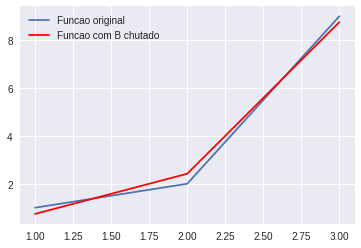

In [63]:
plt.plot(x_pontos,y_pontos,label='Funcao original')
b = [.6,.14,3.7] #Tentativa manual de aproximar a funcao!

y_func = [b[0] +b[1]*x**b[2] for x in x_pontos]

plt.plot(x_pontos,y_func,'r-',label='Funcao com B chutado')
plt.legend()

In [64]:
x_pontos = [1,2,3]
y_pontos = [1,2,9]

Criando a funcao e as derivadas que serao usadas no metodo:

In [65]:
func_minimos = lambda b0,b1,b2 : [[b0+b1*x**b2 - y] for x,y in zip(x_pontos,y_pontos)]
derivadas = lambda b0,b1,b2 : [[1,x**b2,b1*(x**b2)*math.log(x)] for x in x_pontos]

In [66]:
ajuste(func_minimos,derivadas,[[0.6],[0.14],[3.7]])

array([[0.96916549],
       [0.03083451],
       [5.06312221]])